In [1]:
install.packages("dbscan")
library(dbscan)
install.packages("fpc")
install.packages("factoextra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


<span style="color:#51a2d6; font-size:24px; font-weight:700"> Hierarchical Clustering</span>

In this practice, we will apply hierarchical clustering to the same data sets as we did in [k-means clustering practice](KMeans_Clustering.ipynb). 
Take a look at that practice first, if you haven't done so yet. 

'data.frame':	150 obs. of  3 variables:
 $ X    : num  4.92 2.2 2.38 4.37 2.08 ...
 $ Y    : num  3.31 2.76 2.27 2.68 2.19 ...
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...


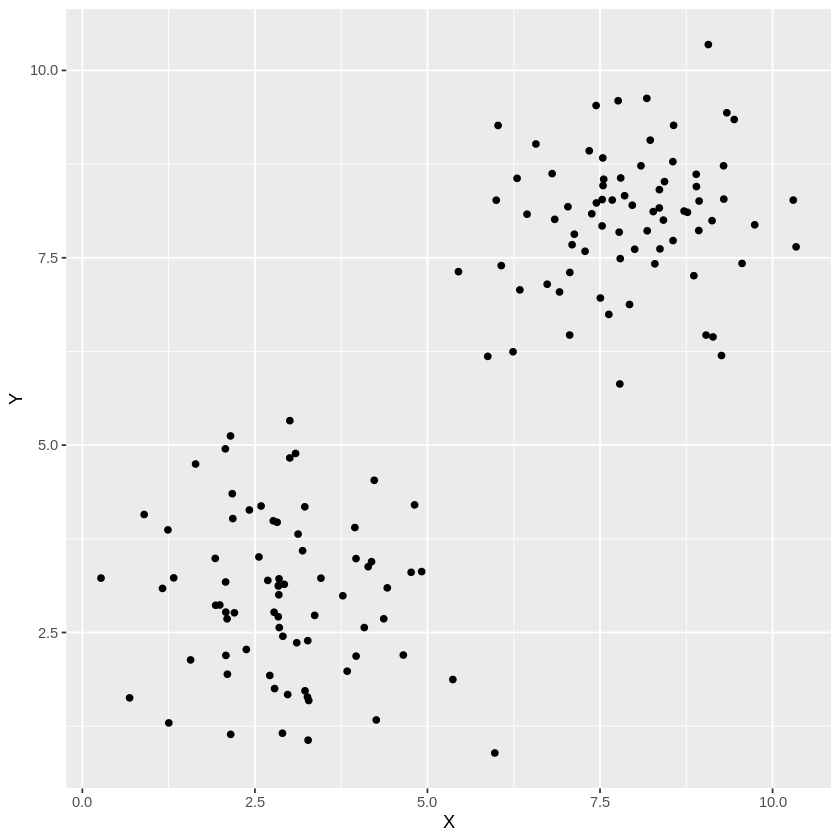

In [2]:
# read data from the file
points_data1 <- read.csv("/dsa/data/all_datasets/toydata/data1.csv",header=TRUE)

str(points_data1)
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(colour="black")
plot1

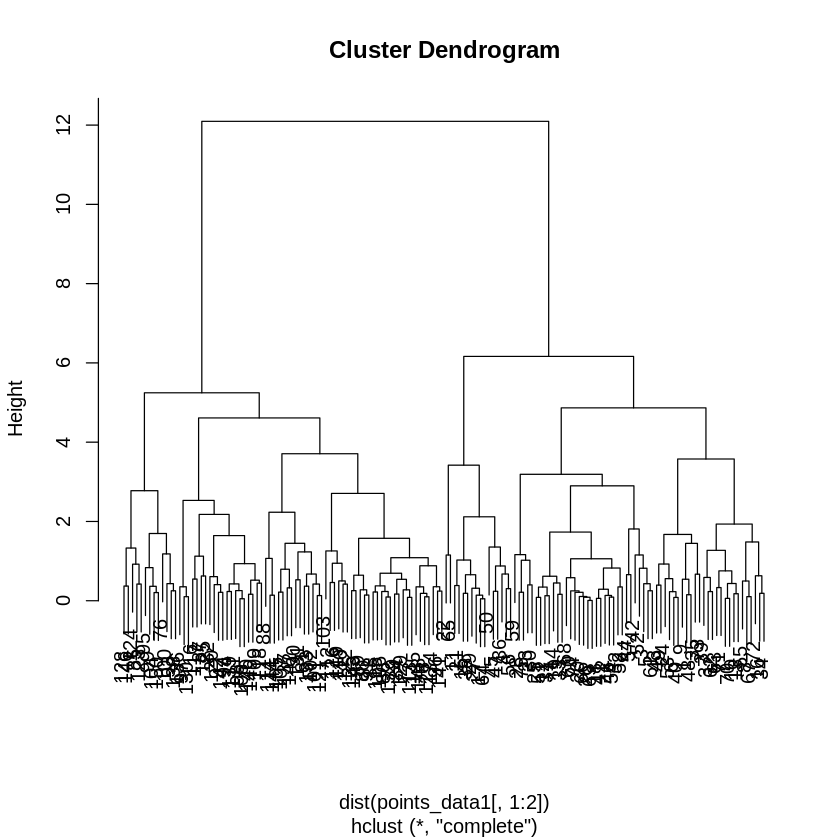

In [3]:
# Let's apply hierarchical clustering to this data set
set.seed(42)

hc_clust11 <- hclust(dist(points_data1[, 1:2]), method = "complete")
# hclust() performs hierarchical cluster analysis on a set of dissimilarities and methods for 
# analyzing it.  Initially, each object is assigned to its own cluster and then the algorithm 
# proceeds iteratively, at each stage joining the two most similar clusters, continuing until 
# there is just a single cluster. 

plot(hc_clust11)

In a dendrogram, the height gives a good idea about how "far" the clusters are in terms of dissimilarity. 
Above, it seems like there are two clusters in this data set based on the heights of the tree branches. 
Let's cut it at two clusters and visualize them.

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

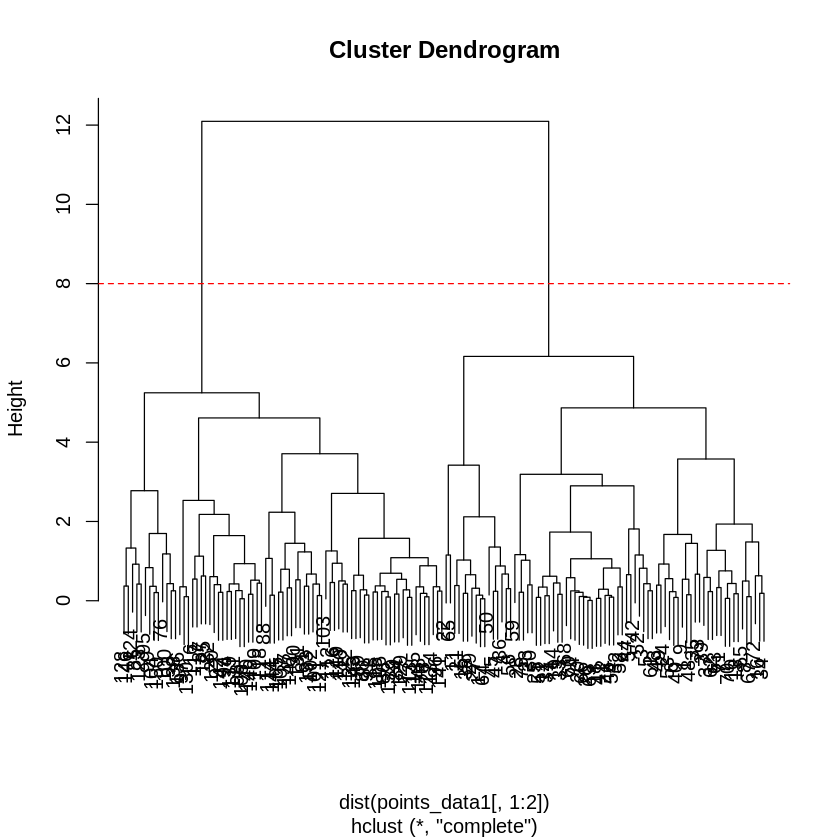

In [4]:
cutree(hc_clust11, k = 2)

plot(hc_clust11)

depth.cutoff = 8
abline(h=depth.cutoff,col="red",lty=2)

**[Dig deeper: Different ways of plotting dendrograms](https://rpubs.com/gaston/dendrograms)**

[1] 1 1 1 1 1 1

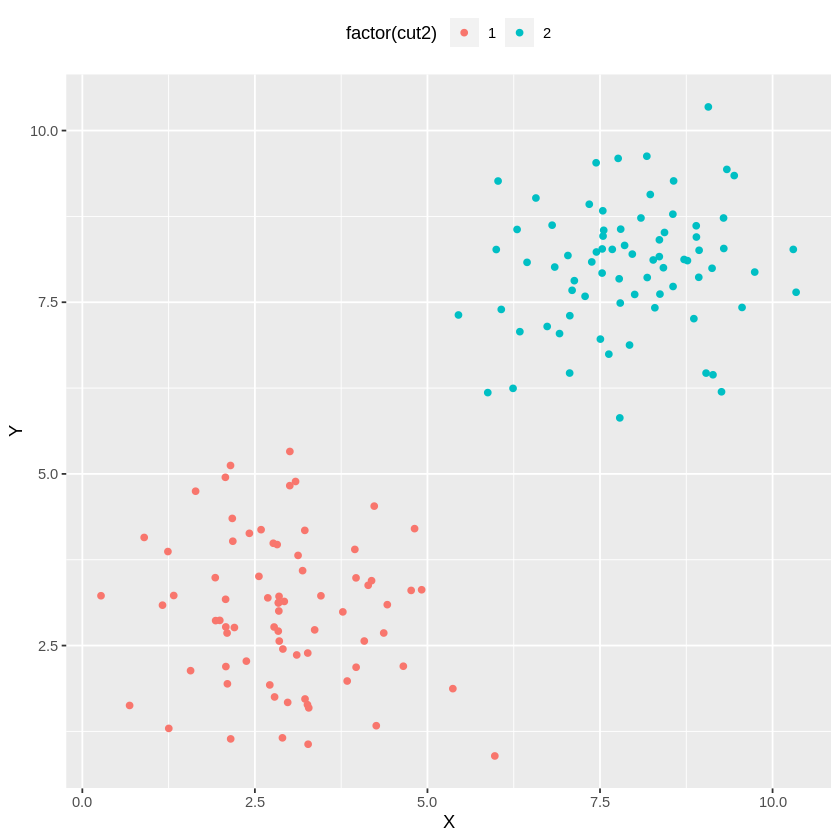

In [5]:
# cut the tree at two clusters; cutree() returns labels for each point.
cut2 = cutree(hc_clust11, 2)
head(cut2)

# use labels to visualize hclust clusters
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(color = factor(cut2))) + theme(legend.position = "top")
plot1

We can do the same by using `eclust` function of **factoextra** library like following:

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
“argument frame is deprecated; please use ellipse instead.”

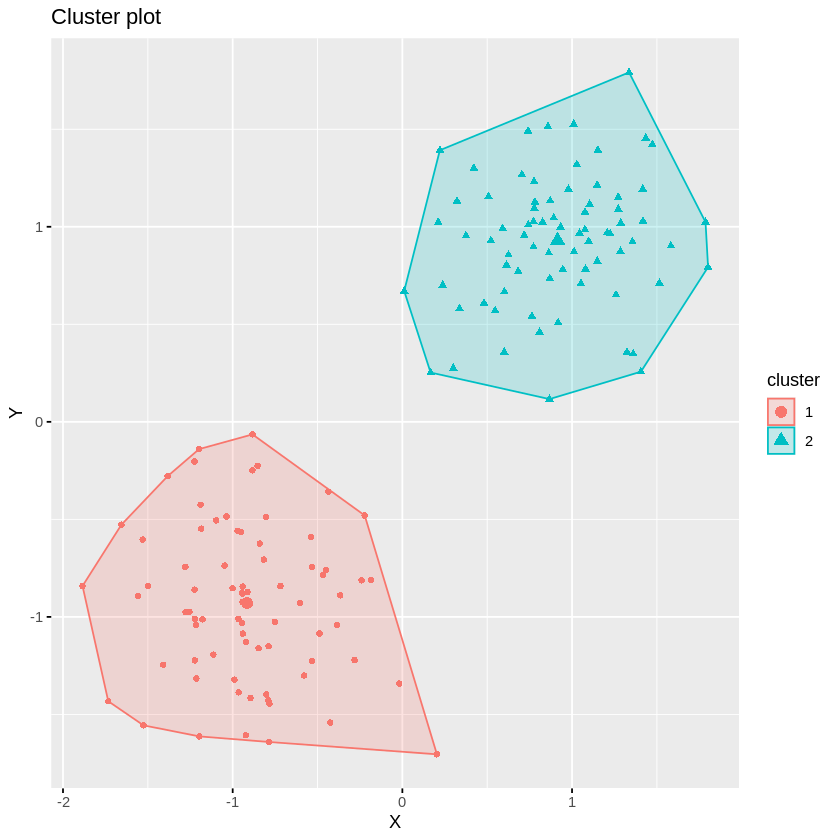

In [6]:
library(factoextra)

# run k-means on this data and visualize 
km <- eclust(points_data1[, 1:2], "kmeans", k = 2, nstart = 20, graph = FALSE)
# eclust() provides a solution for enhancing the workflow of clustering analyses 
# and ggplot2-based elegant data visualization

fviz_cluster(km, geom = "point", frame = FALSE)

Warning message:
“argument frame is deprecated; please use ellipse instead.”

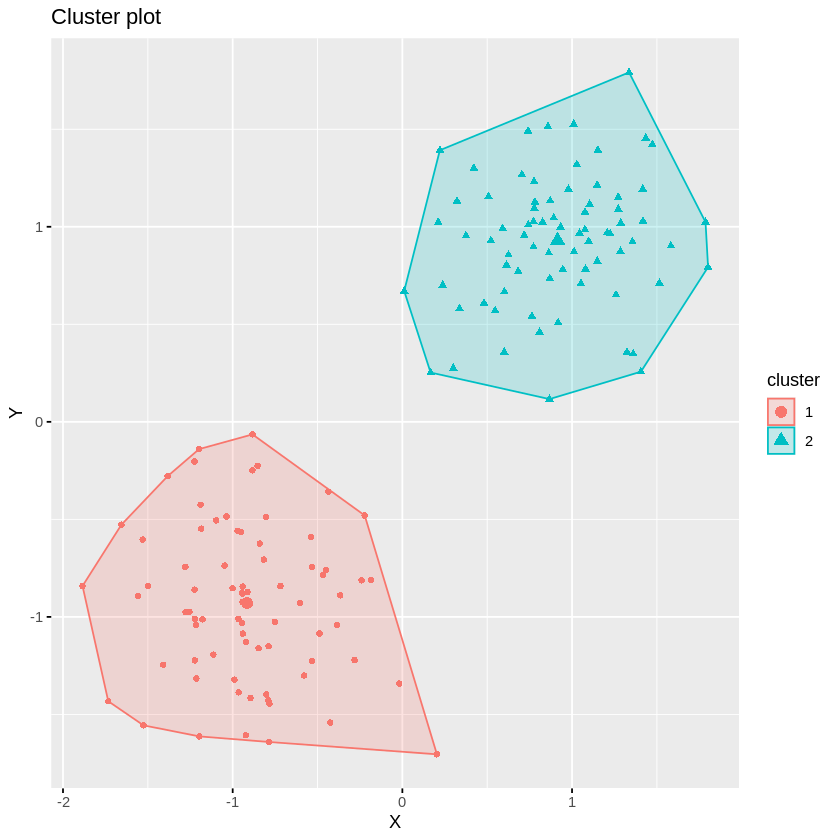

In [7]:
# run hclust on this data and visualize 
hc <- eclust(points_data1[, 1:2], "hclust", k = 2, method = "complete", graph = FALSE) 

# plot clusters
fviz_cluster(hc, geom = "point", frame = FALSE)

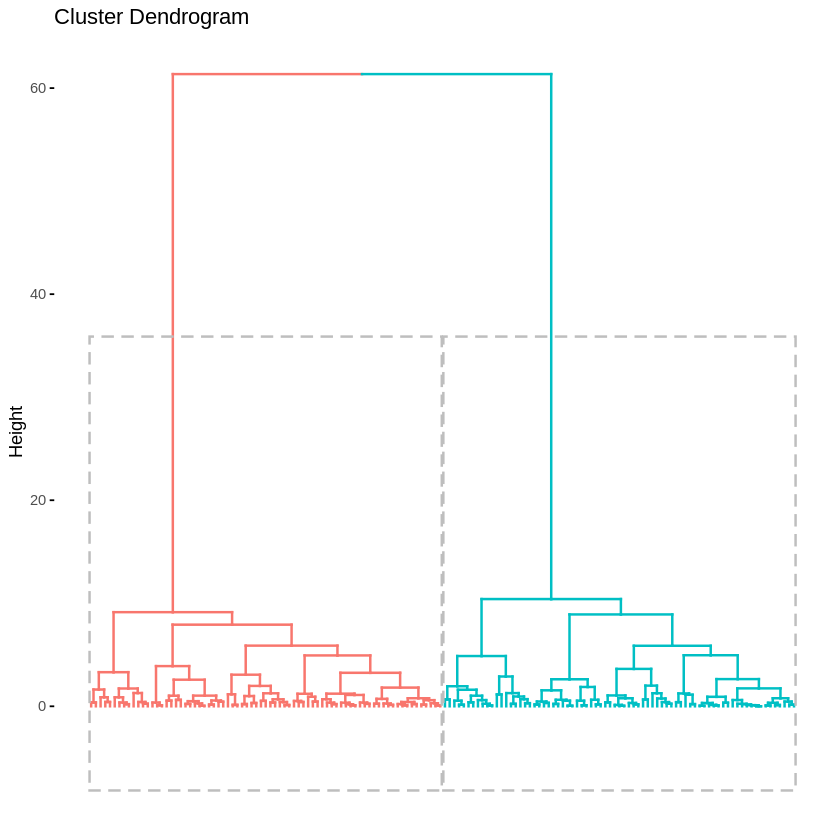

In [8]:
# also plot the dendrogram
fviz_dend(hc, rect = TRUE, show_labels = FALSE) 

In [9]:
# Let's compare the cluster assignments to the actual class labels
table(cut2, points_data1$class)
# or 
table(hc$cluster, points_data1$class)

    
cut2 -1  1
   1  0 75
   2 75  0

   
    -1  1
  1  0 75
  2 75  0

Let's see how it looks like for three clusters. 

## <span style="background:yellow">YOUR TURN</span>


**Activity 1: ** Fit a hierarchical clustering model using `eclust` in `factoextra` package. 
Plot the clusters and dendogram.

In [ ]:
## Complete the partially incomplete code and run the cell

# run hclust on this data and visualize 
hc2 <- eclust(points_data1[, 1:2], "hclust", k = 2, method = "complete", graph = FALSE) 
# plot clusters
fviz_cluster(hc2, <what goes in here>)
# Dendrogram
fviz_dend(hc2, <what goes in here>) 

Three clusters don't make much sense as can be seen from the branch heights. 
Here, we can use **NbClust** just as in the [k-means clustering practice](KMeans_Clustering.ipynb) 
to find out at what level we should cut the tree. 

Let's apply it to the second data set. 

In [ ]:
# read data from the file 
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv",header=TRUE)

# Visualize the data
plot2 <- ggplot(points_data2, aes(X, Y)) + geom_point(colour="black")
plot2

## <span style="background:yellow">YOUR TURN</span>

**Activity 2: ** 
Repeat activity 1 with points_data2 dataset. 
Fit a hierarchical clustering model with two clusters using eclust in factoextra package. 
Plot the clusters and dendogram.

In [ ]:
## Complete the partially incomplete code and run the cell

# run hclust on this data and visualize 
hc3 <- <what goes in here>
# plot clusters
fviz_cluster(<what goes in here>)
# Dendrogram
fviz_dend(<what goes in here>) 

Let's  see how well it does; compute the confusion given the actual labels. 

## <span style="background:yellow">YOUR TURN</span>


**Activity 3: ** Compute the confusion given the actual labels.

In [ ]:
table(<what goes in here>)

Let's try the same approach for the third data set. 
From [k-means clustering practice](KMeans_Clustering.ipynb), 
we know that best number of clusters is either 3 or 6 depending on our choice of scale. 
Let's see how `hclust` does for those numbers. 

In [ ]:
# read data from file
points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv",header=TRUE)
plot3 <- ggplot(points_data3, aes(X, Y)) + geom_point(colour="black")
plot3

## <span style="background:yellow">YOUR TURN</span>

**Activity 4: ** Repeat activity 1 with points_data3 dataset. 
Fit a hierarchical clustering model with 3 clusters using eclust in factoextra package. 
Plot the clusters and dendogram.

In [ ]:
## Complete the partially incomplete code and run the cell

# run hclust on this data and visualize 
hc4 <- <what goes in here>
# plot clusters
fviz_cluster(<what goes in here>)
# Dendrogram
fviz_dend(<what goes in here>) 

**Activity 5: ** Fit a hierarchical clustering model on points_data3 with 6 clusters using `eclust` 
in `factoextra` package. 
Plot the clusters and dendogram.

In [ ]:
# run hclust on this data and visualize 
hc5 <- <what goes in here>
# plot clusters
fviz_cluster(<what goes in here>)
# Dendrogram
fviz_dend(<what goes in here>) 

Judging from the branch heights, both 3 and 6 look like reasonable numbers for number of clusters. 
4 is not bad either. 

# Save your notebook!